In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving HRDataset_v13.csv to HRDataset_v13.csv


{'HRDataset_v13.csv': b'Employee_Name,MaritalStatusID,GenderID,DeptID,PerfScoreID,PayRate,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount\r\n"Brown, Mia",1,0,1,3,28.5,1,2.04,2,6\r\n"LaRotonda, William  ",2,1,1,3,23,1,5,4,4\r\n"Steans, Tyrone  ",0,1,1,3,29,1,3.9,5,5\r\n"Howard, Estelle",1,0,1,3,21.5,2,3.24,3,4\r\n"Singh, Nan ",0,0,1,3,16.56,2,5,3,5\r\n"Smith, Leigh Ann",1,0,1,3,20.5,2,3.8,4,4\r\n"Bunbury, Jessica",1,0,6,3,55,3,3.14,5,0\r\n"Carter, Michelle ",0,0,6,3,55,3,5,5,0\r\n"Dietrich, Jenna  ",0,0,6,1,55,3,2.3,1,0\r\n"Digitale, Alfred",1,1,6,3,56,3,3.6,5,0\r\n"Friedman, Gerry",0,1,6,3,55.5,3,3.65,5,0\r\n"Gill, Whitney  ",4,0,6,3,55,3,3.97,4,0\r\n"Gonzales, Ricardo",1,1,6,3,55.5,3,3.98,3,0\r\n"Guilianno, Mike",0,1,6,3,55,3,4.5,5,0\r\n"Leruth, Giovanni",3,1,6,3,55,3,4.53,3,0\r\n"Mullaney, Howard",0,1,6,1,55,3,1.93,3,0\r\n"Ozark, Travis",0,1,6,3,55,3,5,5,0\r\n"Strong, Caitrin",1,0,6,3,54,3,2,4,0\r\n"Valentin,Jackie",1,0,6,3,55,3,2.81,3,0\r\n"Villanueva, Noah",0,1,6,3

In [3]:
df=pd.read_csv("HRDataset_v13.csv")

In [4]:
df.head()

,Employee_Name,MaritalStatusID,GenderID,DeptID,PerfScoreID,PayRate,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1,0,1,3,28.50,1,2.04,2,6
1,"LaRotonda, William",2,1,1,3,23.00,1,5.00,4,4
2,"Steans, Tyrone",0,1,1,3,29.00,1,3.90,5,5
3,"Howard, Estelle",1,0,1,3,21.50,2,3.24,3,4
4,"Singh, Nan",0,0,1,3,16.56,2,5.00,3,5


In [5]:
df.tail()

,Employee_Name,MaritalStatusID,GenderID,DeptID,PerfScoreID,PayRate,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
305,"Daniele, Ann",1,0,3,3,54.1,28,1.55,5,8
306,"Lajiri, Jyoti",1,1,3,3,56.2,28,4.46,5,6
307,"Semizoglou, Jeremiah",1,1,3,3,53.8,28,3.27,4,5
308,"South, Joe",0,1,3,3,53.0,28,5.00,3,4
309,"Warfield, Sarah",4,0,3,3,55.2,28,1.06,4,8


In [8]:
df1=df.corr()
df1

,MaritalStatusID,GenderID,DeptID,PerfScoreID,PayRate,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
MaritalStatusID,1.000000,-0.025479,0.011966,0.047773,-0.082459,0.021703,0.021298,0.001990,-0.051893
GenderID,-0.025479,1.000000,-0.046189,-0.054915,0.136151,-0.075992,-0.037021,-0.053138,0.089131
DeptID,0.011966,-0.046189,1.000000,-0.072365,-0.202810,0.028941,-0.036522,0.031583,-0.791258
PerfScoreID,0.047773,-0.054915,-0.072365,1.000000,0.020695,0.009172,0.056095,0.310654,0.059719
PayRate,-0.082459,0.136151,-0.202810,0.020695,1.000000,-0.383827,-0.024223,0.061525,0.448484
PositionID,0.021703,-0.075992,0.028941,0.009172,-0.383827,1.000000,0.005402,-0.010539,-0.155763
EngagementSurvey,0.021298,-0.037021,-0.036522,0.056095,-0.024223,0.005402,1.000000,-0.017123,-0.040253
EmpSatisfaction,0.001990,-0.053138,0.031583,0.310654,0.061525,-0.010539,-0.017123,1.000000,0.036456
SpecialProjectsCount,-0.051893,0.089131,-0.791258,0.059719,0.448484,-0.155763,-0.040253,0.036456,1.000000


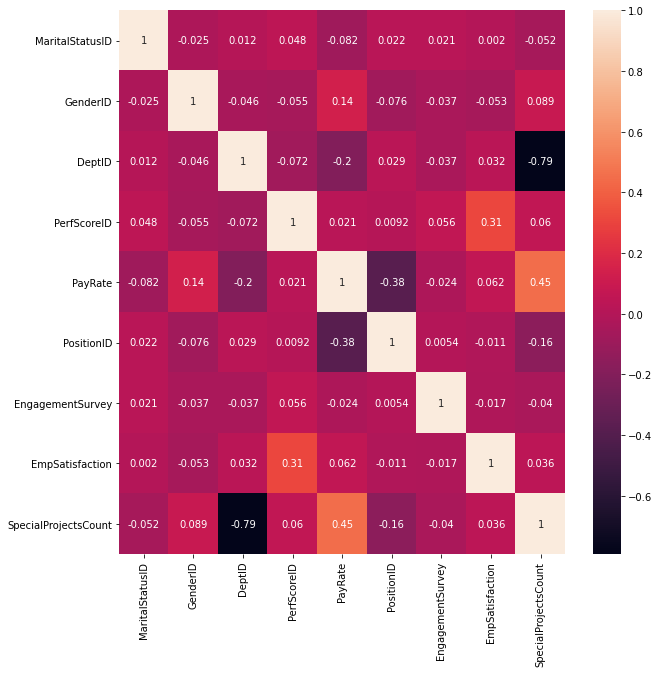

In [13]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df1,annot=True,)

In [16]:
df.isnull().sum()

Employee_Name           0
MaritalStatusID         0
GenderID                0
DeptID                  0
PerfScoreID             0
PayRate                 0
PositionID              0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
dtype: int64

In [17]:
df.nunique()

Employee_Name           310
MaritalStatusID           5
GenderID                  2
DeptID                    6
PerfScoreID               4
PayRate                  94
PositionID               30
EngagementSurvey        188
EmpSatisfaction           5
SpecialProjectsCount      8
dtype: int64

In [19]:
df.drop(columns=['Employee_Name'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MaritalStatusID       310 non-null    int64  
 1   GenderID              310 non-null    int64  
 2   DeptID                310 non-null    int64  
 3   PerfScoreID           310 non-null    int64  
 4   PayRate               310 non-null    float64
 5   PositionID            310 non-null    int64  
 6   EngagementSurvey      310 non-null    float64
 7   EmpSatisfaction       310 non-null    int64  
 8   SpecialProjectsCount  310 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.9 KB


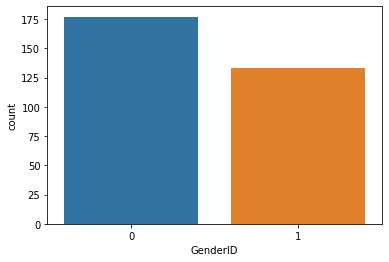

In [22]:
sns.countplot(x='GenderID',data=df)

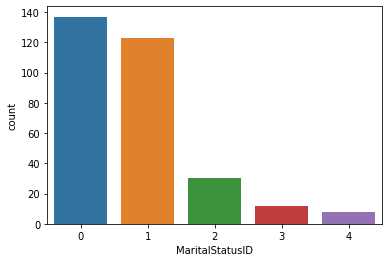

In [23]:
sns.countplot(x='MaritalStatusID',data=df)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [28]:
y = df['PerfScoreID']
X = df.drop(['PerfScoreID'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
rf_model = RandomForestClassifier(n_estimators=400, max_depth=6, oob_score=True, class_weight='balanced', random_state=24)

In [31]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=24, verbose=0,
                       warm_start=False)

In [33]:
rf_pred = rf_model.predict(X_test)

In [34]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.20      0.17      0.18         6
           3       0.81      0.76      0.79        75
           4       0.06      0.09      0.07        11

    accuracy                           0.65        93
   macro avg       0.39      0.50      0.43        93
weighted avg       0.68      0.65      0.66        93



In [35]:
print(accuracy_score(y_test,rf_pred))

0.6451612903225806


## With the model we get an accuracy score of 0.64516

In [46]:
X_train.columns

Index(['MaritalStatusID', 'GenderID', 'DeptID', 'PayRate', 'PositionID',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount'],
      dtype='object')

In [41]:
feature_imp = pd.Series(rf_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [44]:
print(feature_imp)

EngagementSurvey        0.261401
EmpSatisfaction         0.234923
PayRate                 0.156767
PositionID              0.105725
MaritalStatusID         0.100871
DeptID                  0.052878
GenderID                0.050099
SpecialProjectsCount    0.037336
dtype: float64


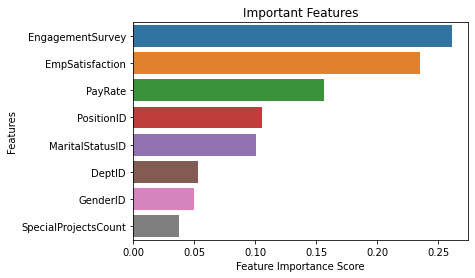

In [43]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

## The following are having the most feature importance values in sorted order. Enggement survey , Emptiaction and Payrate are having the most importance
